In [2]:
import pickle

configs = [(True, True), (False, True), (True, False), (False, False)]
data = []
for max_length, fill_0 in configs:
    data.append(pickle.load(
        open(f't5-large_obqa_fact_epoch_1_{max_length}_{fill_0}_loss.pkl', 'rb')))

In [3]:
import numpy as np
from pandas import DataFrame


def get_str(flex_max_length, fill_0):
    return f"{'Flexible' if flex_max_length else 'Fixed'} Max Length-{'Filled' if fill_0 else 'Not filled'} with 0"


col_name = []
di = {'# Step': np.arange(len(data[0]))}
for idx, (Fixed, fill_0) in enumerate(configs):
    di[get_str(Fixed, fill_0)] = data[idx]

df = DataFrame(di).melt(id_vars='# Step', var_name='Methodology').rename(
    columns={'value': 'Loss value'})  # value_vars=['Flexible Max Length-Fill 0']

In [4]:
accuracy = [[14, 24, 31, 31, 36, 37],
            [44, 55, 62, 60, 62, 66],
            [16, 27, 35, 38, 40, 37],
            [39, 49, 50, 51, 58, 63]]
steps = [150*(i+1) for i in range(len(accuracy[0]))]
di1 = {'# Step': steps}
for idx, (flex_max_length, fill_0) in enumerate(configs):
    di1[get_str(flex_max_length, fill_0)] = accuracy[idx]

df1 = DataFrame(di1).melt(id_vars='# Step', var_name='Methodology').rename(
    columns={'value': 'Accuracy'})

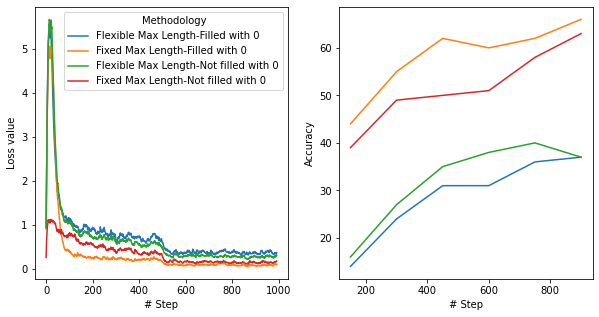

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(df, x='# Step', y='Loss value', hue='Methodology', ax=ax[0])
sns.lineplot(df1, x='# Step', y='Accuracy', hue='Methodology', ax=ax[1])
ax[1].legend().remove()

### Different scheme with fixed max length and filled 0

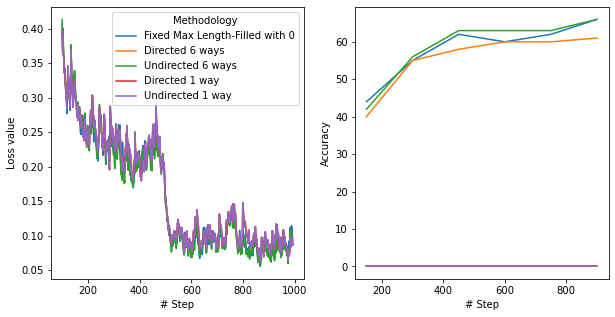

In [14]:
acc1 = [[44, 55, 62, 60, 62, 66],
        [40, 55, 58, 60, 60, 61],
        [42, 56, 63, 63, 63, 66],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]
data[1]
acc_df = {'# Step': steps}
scheme = ['Directed 6 ways', 'Undirected 6 ways',
          'Directed 1 way', 'Undirected 1 way']
prime = get_str(flex_max_length=False, fill_0=True)
acc_df[prime] = acc1[0]
acc_df[scheme[0]] = acc1[1]
acc_df[scheme[1]] = acc1[2]
acc_df[scheme[2]] = acc1[3]
acc_df[scheme[3]] = acc1[4]
acc_dfp = DataFrame(acc_df).melt(
    id_vars='# Step', var_name='Methodology').rename(columns={'value': 'Accuracy'})

loss_df = {'# Step': np.arange(len(data[1]))}
loss_df[prime] = data[1]
loss_df[scheme[0]] = pickle.load(
    open(f'6way_new_t5-large_obqa_fact_epoch_1_loss.pkl', 'rb'))
loss_df[scheme[1]] = pickle.load(
    open(f'Scheme.UNDIRECTED_6W_new_t5-large_obqa_fact_epoch_1_loss.pkl', 'rb'))
loss_df[scheme[2]] = pickle.load(
    open(f'6way_new_t5-large_obqa_fact_epoch_1_loss.pkl', 'rb'))
loss_df[scheme[3]] = pickle.load(
    open(f'6way_new_t5-large_obqa_fact_epoch_1_loss.pkl', 'rb'))
loss_dfp = DataFrame(loss_df).melt(id_vars='# Step', var_name='Methodology').rename(
    columns={'value': 'Loss value'})  # value_vars=['Flexible Max Length-Fill 0']
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(loss_dfp[loss_dfp['# Step'] > 100], x='# Step',
             y='Loss value', hue='Methodology', ax=ax[0])
sns.lineplot(acc_dfp, x='# Step', y='Accuracy', hue='Methodology', ax=ax[1])
ax[1].legend().remove()

In [16]:
l1, l2 = pickle.load(
    open('Scheme.UNDIRECTED_6W_hyper_weight_values.pkl', 'rb'))

<AxesSubplot:xlabel='Imaginary Positional Distance', ylabel='L2 Norm'>

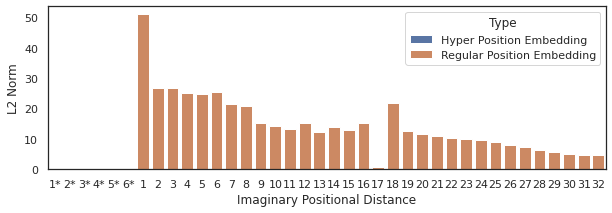

In [44]:
from numpy import linalg

kk = {'Type': ['Hyper Position Embedding']*6, 'Imaginary Positional Distance': [
    f'{x}*' for x in range(1, 7)], 'L2 Norm': [linalg.norm(x) for x in l1]}
for index, m in enumerate(l2):
    kk['Type'].append('Regular Position Embedding')
    kk['Imaginary Positional Distance'].append(index+1)
    kk['L2 Norm'].append(linalg.norm(m))
df_norm = DataFrame(kk)
sns.set_theme(style="white", rc={'figure.figsize': (10, 3)})
sns.barplot(df_norm, x='Imaginary Positional Distance', y='L2 Norm', hue='Type')

In [28]:
df_norm

,Type,Edge,L2 Norm
0,Hyper Position Embedding,Edge 1,0.122185
1,Hyper Position Embedding,Edge 2,0.098034
2,Hyper Position Embedding,Edge 3,0.094323
3,Hyper Position Embedding,Edge 4,0.087401
4,Hyper Position Embedding,Edge 5,0.134561
5,Hyper Position Embedding,Edge 6,0.141725
